
# AutoRegressive Moving Average (ARMA) Model 


In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.api as smtsa
from statsmodels.tsa import arima_process

In [2]:
# Function to plot signal, ACF and PACF
def plotds(xt, nlag=30, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    # Assign axes
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    # Plot graphs
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    return None
    

## ARMA Model

/Users/alfred/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


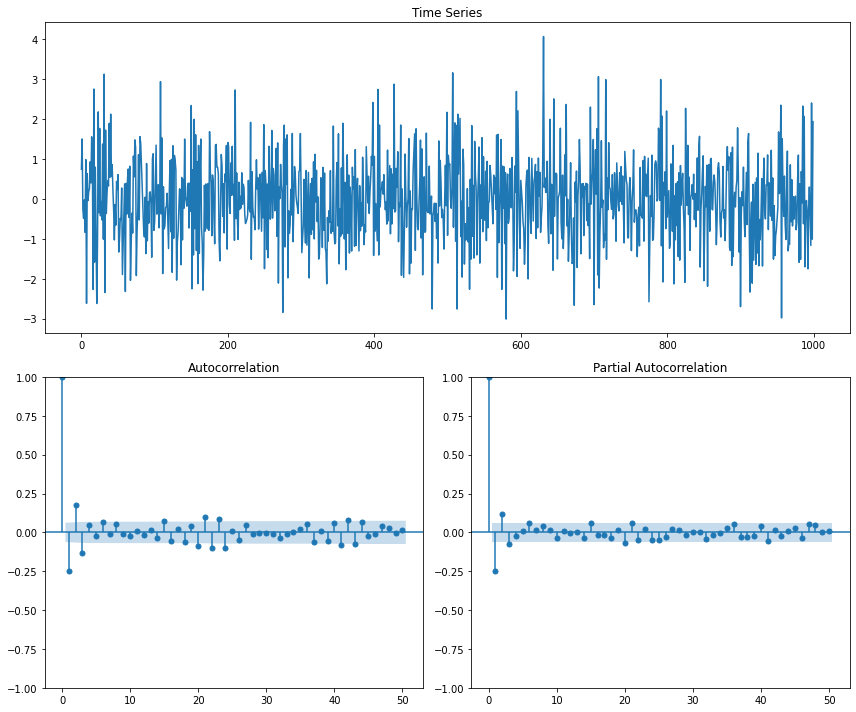

In [14]:
# Simulate AR(1) data

ar = np.array([1,0.6])
ma = np.array([1,0.3])
data = smtsa.arma_generate_sample(ar,ma,1000) 
plotds(data)


In [16]:
# Build ARMA model
model = ARIMA(data, order=(1, 0, 1))

## Fitting the model, disp=0 is to switch off verbose display
trained_model = model.fit()

## Printing a summary of the model
trained_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1433.695
Date:                Fri, 24 Jun 2022   AIC                           2875.390
Time:                        22:48:07   BIC                           2895.021
Sample:                             0   HQIC                          2882.851
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0148      0.028     -0.525      0.599      -0.070       0.040
ar.L1         -0.6805      0.079     -8.572      0.000      -0.836      -0.525
ma.L1          0.4669      0.095      4.938      0.000       0.282       0.652
sigma2         1.0298      0.044     23.622      0.000       0.944       1.115
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 6.47
Prob(Q):                              0.89   Prob(JB):                         0.04
Heteroskedasticity (H):               1.02   Skew:                             0.15
Prob(H) (two-sided):                  0.84   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## ARMA Forecasting on Stock Data

[*********************100%***********************]  1 of 1 completed


/Users/alfred/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


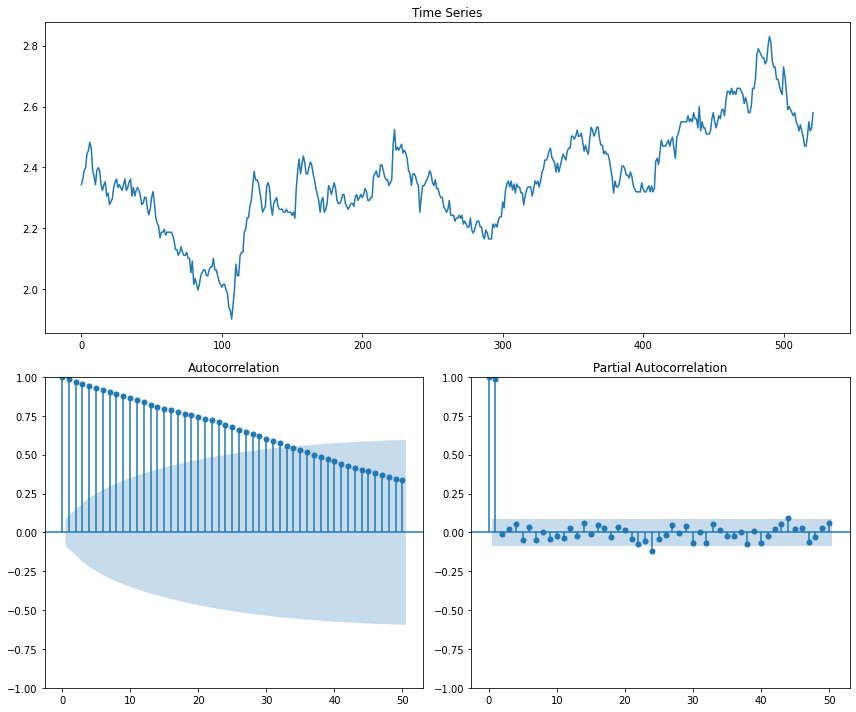

In [17]:
import yfinance as yf

data = yf.download('Z74.SI', start = '2020-06-01')

plotds(data['Adj Close'].values)

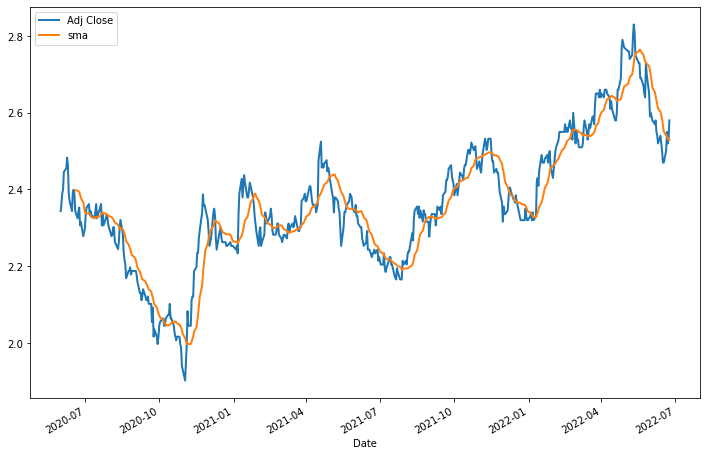

In [18]:
data['sma'] = data['Adj Close'].rolling(15).mean()
data[['Adj Close','sma']].plot(lw=2,figsize=(12,8));

In [31]:
model = ARIMA(data['Adj Close'], order=(1, 0, 1))
trained_model = model.fit()
trained_model.summary()

/Users/alfred/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/alfred/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/alfred/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                  522
Model:                 ARIMA(1, 0, 1)   Log Likelihood                1150.653
Date:                Fri, 24 Jun 2022   AIC                          -2293.305
Time:                        22:51:11   BIC                          -2276.274
Sample:                             0   HQIC                         -2286.635
                                - 522                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3624      0.103     22.970      0.000       2.161       2.564
ar.L1          0.9878      0.007    151.210      0.000       0.975       1.001
ma.L1          0.0407      0.039      1.045      0.296      -0.036       0.117
sigma2         0.0007    3.4e-05     20.807      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                65.97
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                             0.43
Prob(H) (two-sided):                  0.49   Kurtosis:                         4.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
start_date = '2020-06-01'
end_date   = '2022-06-20'
data['forecast'] = trained_model.predict(start=start_date, end=end_date)

In [33]:
data[['Adj Close','sma','forecast']].tail(10)

,Adj Close,sma,forecast
Date,,,
2022-06-13,2.54,2.602000,2.517356
2022-06-14,2.52,2.593333,2.538749
2022-06-15,2.50,2.584000,2.517308
2022-06-16,2.47,2.566667,2.497611
2022-06-17,2.47,2.551333,2.467558
2022-06-20,2.50,2.541333,2.468783
2022-06-21,2.55,2.538667,NaN
2022-06-22,2.52,2.533333,NaN
2022-06-23,2.53,2.529333,NaN


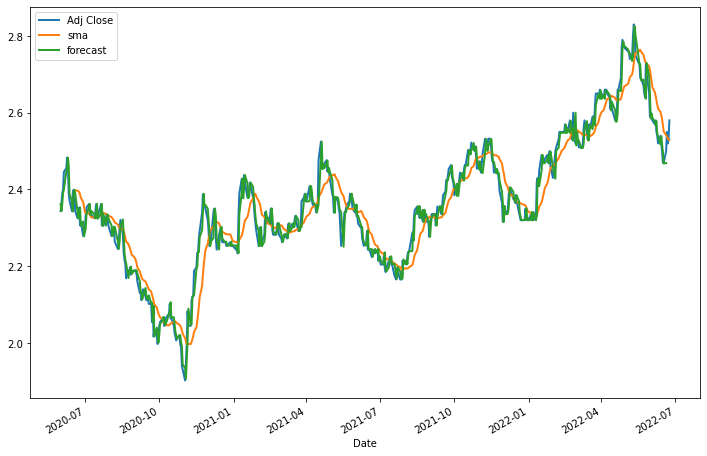

In [34]:
data[['Adj Close','sma','forecast']].plot(lw=2,figsize=(12,8));